# PROBLEMA #1: Filtros y Detectores

In [134]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys


In [ ]:
img = cv2.imread('img/Problema1.jpg')
# 1. Copia de la imagen original con el filtro de gauss 25 x 25
filtro_gauss = cv2.GaussianBlur(img, (25,25),0)
# 2. Copia de la imagen original con el Filtro bilaterial con diametro 39
filtro_bilateral = cv2.bilateralFilter(img, 39, 75, 75)

cv2.imwrite('out/filtro_gauss.png', filtro_gauss)
cv2.imwrite('out/filtro_bilateral.png', filtro_bilateral)

In [106]:
#Carga de imagenes
imgname = 'img/Problema1.jpg'
imgMSER = cv2.imread(imgname)
grayMSER = cv2.cvtColor(imgMSER, cv2.COLOR_BGR2GRAY)
#Creacion del detector
mser = cv2.MSER_create()

coordinates, bboxes = mser.detectRegions(grayMSER)

In [136]:
coords = []
for coord, bbox in zip(coordinates, bboxes):
    x,y,w,h = bbox
    if w< 10 or h < 10 or w/h > 5 or h/w > 5:
        continue
    coords.append(coord)
print( f"Regiones Detectadas usando MSER Detector : {len(coordinates)}")

Regiones Detectadas usando MSER Detector : 101


Regiones identificadas: 101


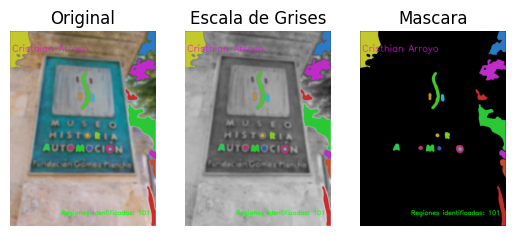

In [108]:
colors = [[43, 43, 200], [43, 75, 200], [43, 106, 200], [43, 137, 200],
[43, 169, 200], [43, 200, 195], [43, 200, 163], [43, 200, 132],
[43, 200, 101], [43, 200, 69], [54, 200, 43], [85, 200, 43],
[116, 200, 43], [148, 200, 43], [179, 200, 43], [200, 184, 43],
[200, 153, 43], [200, 122, 43], [200, 90, 43], [200, 59, 43],
[200, 43, 64], [200, 43, 95], [200, 43, 127], [200, 43, 158],
[200, 43, 190], [174, 43, 200], [142, 43, 200], [111, 43, 200],
[80, 43, 200], [43, 43, 200]]

np.random.seed(0)
canvas1 = imgMSER.copy()
canvas2 = cv2.cvtColor(grayMSER, cv2.COLOR_GRAY2BGR)
canvas3 = np.zeros_like(imgMSER)

for cnt in coords:
    xx = cnt[:,0]
    yy = cnt[:,1]
    color = colors[np.random.choice(len(colors))]
    canvas1[yy, xx] = color
    canvas2[yy, xx] = color
    canvas3[yy, xx] = color

#Configuracion del texto
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.5
font_color = (255, 0, 255)
font_thickness = 2

text1 = 'Cristhian Arroyo'
cv2.putText(canvas1, text1, (10, 100), font, font_scale, font_color, font_thickness)
cv2.putText(canvas2, text1, (10, 100), font, font_scale, font_color, font_thickness)
cv2.putText(canvas3, text1, (10, 100), font, font_scale, font_color, font_thickness)

text2 = f"Regiones identificadas: {len(coordinates)}"
print(text2)
font_color = (0, 255, 0)
font_scale = 1 
cv2.putText(canvas1, text2, (250, 900), font, font_scale, font_color, font_thickness)
cv2.putText(canvas2, text2, (250, 900), font, font_scale, font_color, font_thickness)
cv2.putText(canvas3, text2, (250, 900), font, font_scale, font_color, font_thickness)

cv2.imwrite('out/canvas2_GAUSS.png', canvas2)

plt.subplot(131)
plt.imshow(canvas1[:, :, ::-1])
plt.title('Original')
plt.axis('off')
plt.subplot(132)
plt.imshow(canvas2[:, :, ::-1])
plt.title('Escala de Grises')
plt.axis('off')
plt.subplot(133)
plt.imshow(canvas3[:, :, ::-1])
plt.title('Mascara')
plt.axis('off')
plt.savefig("out/GAUSS_MSER_Result.png", dpi=600, transparent=True)
plt.show()


# Matriz con 6 imagenes

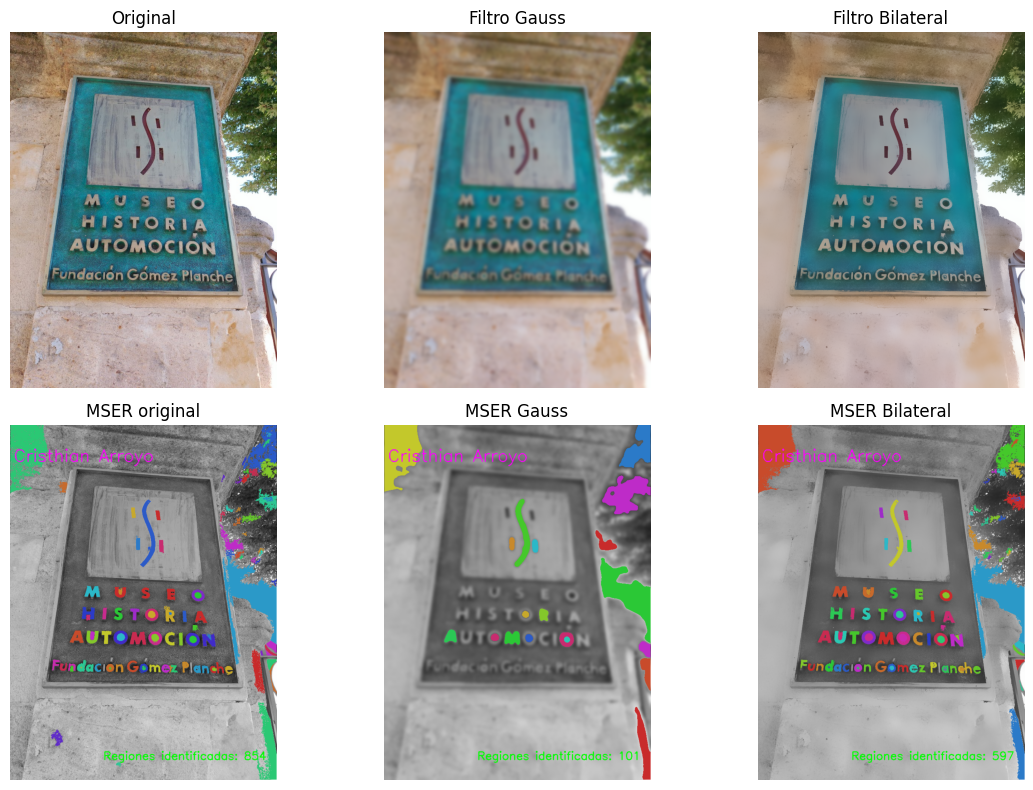

In [114]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

rutas_imagenes = ['img/Problema1.jpg', 'out/filtro_gauss.png', 'out/filtro_bilateral.png',
                  'out/canvas2_original.png', 'out/canvas2_GAUSS.png', 'out/canvas2_BILATERAL.png']

rotulados = ['Original', 'Filtro Gauss', 'Filtro Bilateral', 
             'MSER original', 'MSER Gauss', 'MSER Bilateral']

for i, ruta in enumerate(rutas_imagenes):
    imagen = plt.imread(ruta)
    axs[i // 3, i % 3].imshow(imagen)
    axs[i // 3, i % 3].set_title(rotulados[i])
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.savefig("out/problema1_Filtro_detectores.png", dpi=600)
plt.show()


# Problema 2: Transformada de Hough

# Problema 3: Procesamiento en tiempo real

In [129]:
#2. Reduccion de la imagen en un 45%
def resize(frame:np.ndarray):
    w,h = int(frame.shape[1] * 0.55), int(frame.shape[0] * 0.55)
    frame_resize = cv2.resize(frame, (w, h))
    return frame_resize

In [130]:
#3. Detector ORB sobre la imagen escalada
def detector_orb (imgORB: np.ndarray):
    orb = cv2.ORB_create(nfeatures=500)
    kp = orb.detect(imgORB, None)
    imgORB2 = cv2.drawKeypoints(imgORB, kp, None, color=(0, 0, 255), flags=0)
    return imgORB2

In [133]:
#1. Cargar vídeo (Configuracion del codigo para trabajar con camaras)
cap = cv2.VideoCapture('img/video.mp4')
#Contador de capturas
i = 0

if cap is None:
    sys.exit('Fallo al cargar video')

while (cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        frame_resize = resize(frame)
        frame_resizeORB = detector_orb(frame_resize)
        #Mostrar el video con los frames cambiados.
        cv2.imshow('frame', frame_resizeORB)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
        # 6. Permitir que el sistema guarde una captura
        key = cv2.waitKey(25)
        if key == ord('s'):
            cv2.imwrite(f'out/captura{i}.png', frame_resizeORB)
            print(f'Captura guardada como "captura{i}.png"')
            i+=1
    else:
        break

cap.release()
cv2.destroyAllWindows()